In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Get Energy of H2 molecule from samples

In [2]:
folder = "H2_data/"
filename_wvfct = "R_0.2_psi.txt"
filename_samples = "R_0.2_samples.txt"

samples = np.loadtxt(folder + filename_samples)
wvfct = np.loadtxt(folder + filename_wvfct)

### Load coefficients

The coefficients are from https://arxiv.org/pdf/1512.06860.pdf from the appendix

In [3]:
coeff = np.loadtxt("H2_coefficients.txt")

### Find frequency / probability of all measurements

In [4]:
basis = np.array([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])

def find_sample_frequency(samples):
    freq = []
    for b in basis:
        l = len(np.where((samples == b).all(axis=1))[0])
        freq.append(l)
    return np.array(freq) / samples.shape[0]

freq = find_sample_frequency(samples)
print(freq)

[0.     0.0015 0.9985 0.    ]


### Define all operators of Hamiltonian

In [5]:
def one(freq):
    return freq.sum()

def Z0(freq):
    return freq[:2].sum() - freq[2:4].sum()

def Z1(freq):
    return freq[[0,2]].sum() - freq[[1,3]].sum()

def Z0Z1(freq):
    return freq[[0,3]].sum() - freq[[1,2]].sum()

def X0X1(freq):
    return 2*np.sqrt(freq)[[1,2]].prod() + 2*np.sqrt(freq)[[0,3]].prod()

def Y0Y1(freq):
    return 2*np.sqrt(freq)[[1,2]].prod() - 2*np.sqrt(freq)[[0,3]].prod() # Y0Y1 gives minus sign to [00] and [11]

In [6]:
print(np.sqrt(freq)[[1,2]])

print(Z0(freq))

[0.03872983 0.99924972]
-0.9970000000000001


### Define Hamiltonian

In [7]:
def energy(samples, coeff):
    f = find_sample_frequency(samples)
    c1, c2, c3, c4, c5, c6 = coeff[1:-1]
    return c1*one(f) + c2*Z0(f) + c3*Z1(f) + c4*Z0Z1(f) - c5*X0X1(f) - c5*Y0Y1(f)

In [8]:
energy(samples, coeff[0])

0.1442108747311382

### Get all the energies for different R

0.1442108747311382
-0.32393547532546085
-0.6129039934108025
-0.8005095231150423
-0.9252580817605964
-1.0090086249753596
-1.065391290215357
-1.1022968998091112
-1.1255870371941183
-1.1389408436501118
-1.1449518561275118
-1.1455985374846123
-1.1426275996357371
-1.1366197707399515
-1.1285246121015233
-1.11929731061878
-1.1088894817596542
-1.0980083757150465
-1.0868155659324854
-1.0753656599951447
-1.0642022250418144
-1.0534371372280913
-1.0429909176307628
-1.0329255626795484
-1.0235793844779455
-1.0148219637906388
-1.0066304034616804
-0.999024596529867
-0.9922208295295207
-0.9858019801897506
-0.9800155269872983
-0.9751547052866762
-0.9708063813726301
-0.96681942503982
-0.9632910274850662
-0.9603380642016857
-0.9576117229960117
-0.9552226828746919
-0.953433481076329
-0.9515983821584779
-0.9501822397766282
-0.9490056352051296
-0.9478686468761977
-0.9469689234886284
-0.9461560561584954
-0.9454307947133702
-0.9448669090603317
-0.9445449709801791
-0.9441460761802778
-0.9438417682698375
-0.9436

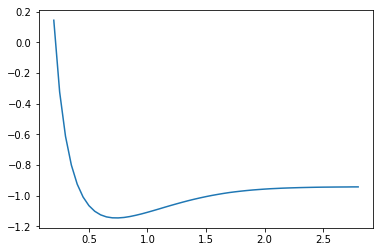

In [9]:
energies = []
x_axis = []
for i in range(53):
    R = coeff[i][0]
    try: 
        filename_samples = "R_{}_samples.txt".format(R)
        samples = np.loadtxt(folder + filename_samples)
        E = energy(samples, coeff[i])
        energies.append(E)
        x_axis.append(R)
        print(E)
    except:
        print("No sample file for R = {}".format(R))
        
plt.plot(x_axis, energies)
plt.show()

## Next step: Train RBM on this data and sample from it


